In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content

Mounted at /content/gdrive
/content


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
token = {"username":"darkangel24","key":"141b363f52c1ebe770b120c3047cec0e"}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ethan404/captcha6digits # 6
!unzip captcha6digits.zip
!kaggle datasets download -d sohamrakhunde/vahan-website-captcha-dataset # 5
!unzip vahan-website-captcha-dataset.zip
!kaggle datasets download -d brunoasnascimento/captcha # 4
!unzip captcha.zip
!kaggle datasets download -d fournierp/captcha-version-2-images # 5
!unzip captcha-version-2-images.zip
!kaggle datasets download -d anaselmasry/captcha-break-dataset # 4
!unzip captcha-break-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/HVHF.png           
  inflating: data/HVP8.png           
  inflating: data/HVST.png           
  inflating: data/HVV8.png           
  inflating: data/HVXC.png           
  inflating: data/HVXJ.png           
  inflating: data/HW3K.png           
  inflating: data/HW77.png           
  inflating: data/HW9K.png           
  inflating: data/HWA7.png           
  inflating: data/HWAP.png           
  inflating: data/HWEU.png           
  inflating: data/HWG5.png           
  inflating: data/HWG9.png           
  inflating: data/HWGW.png           
  inflating: data/HWN8.png           
  inflating: data/HWRY.png           
  inflating: data/HWWQ.png           
  inflating: data/HWZ4.png           
  inflating: data/HX24.png           
  inflating: data/HX5X.png           
  inflating: data/HX9J.png           
  inflating: data/HXJ4.png           
  inflating: data/HXKF.png           
  inflating: data/HXKW.png           

In [ ]:
!rm -r /content/sample_data
!rm /content/captcha6digits.zip
!rm /content/vahan-website-captcha-dataset.zip
!rm /content/captcha.zip
!rm /content/captcha-version-2-images.zip
!rm /content/captcha-break-dataset.zip

In [ ]:
import os
import math
import cv2 as cv
import numpy as np
import pandas as pd
import shutil as sh
import random as rn
import tensorflow as tf
import tensorflow.keras as ks
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
def get_sub(dir):
    paths = []
    for i in os.listdir(dir):
        path = os.path.join(dir, i)
        paths.append(path)
    paths.sort()
    return paths

def make_dir(dir):
    if not os.path.isdir(dir):
        os.mkdir(dir)

def move_content(source_dir, dest_dir):
    paths = get_sub(source_dir)
    make_dir(dest_dir)
    for i in paths:
        if not os.path.isdir(i):
            os.rename(i, os.path.join(dest_dir, os.path.basename(i)))

# move_content('/content', '/content/6_letters')
# move_content('/content/Dataset', '/content/5_letters')
# move_content('/content/Test', '/content/5_letters')
# os.rmdir('/content/Dataset')
# os.rmdir('/content/Test')
# move_content('/content/data', '/content/4_letters')
# move_content('/content/samples', '/content/5_letters')
# sh.rmtree('/content/data')
# sh.rmtree('/content/samples')

In [ ]:
def create_dataframe(dir):
    paths = get_sub(dir)
    letters = []
    labels = []
    for i in paths:
        letters.append(int(dir[9]))
        labels.append(i[19: 19 + int(dir[9])])
    return pd.DataFrame({'img': paths, 'letter': letters, 'label': labels})
df4 = create_dataframe('/content/4_letters')
df5 = create_dataframe('/content/5_letters')
df6 = create_dataframe('/content/6_letters')
df4 = df4.append(df5, ignore_index=True)
df4 = df4.append(df6, ignore_index=True)
df4.head()

,img,letter,label
0,/content/4_letters/222X.png,4,222X
1,/content/4_letters/222a.png,4,222a
2,/content/4_letters/222u.png,4,222u
3,/content/4_letters/2233.png,4,2233
4,/content/4_letters/2236.png,4,2236


In [ ]:
df = df4
df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)
df.head()

,img,letter,label
0,/content/5_letters/hfca8.png,5,hfca8
1,/content/4_letters/7CLG.png,4,7CLG
2,/content/4_letters/w9q7.png,4,w9q7
3,/content/5_letters/y48c3.png,5,y48c3
4,/content/4_letters/36KC.png,4,36KC


In [ ]:
df['img_h'] = df['img'].apply(lambda x: cv.imread(x).shape[0])
df['img_w'] = df['img'].apply(lambda x: cv.imread(x).shape[1])
df.describe()

,letter,img_h,img_w
count,47363.000000,47363.00000,47363.000000
mean,4.684311,52.83713,152.210713
std,0.798945,20.61569,50.027939
min,4.000000,24.00000,72.000000
25%,4.000000,45.00000,126.000000
50%,4.000000,50.00000,190.000000
75%,5.000000,80.00000,190.000000
max,6.000000,80.00000,200.000000


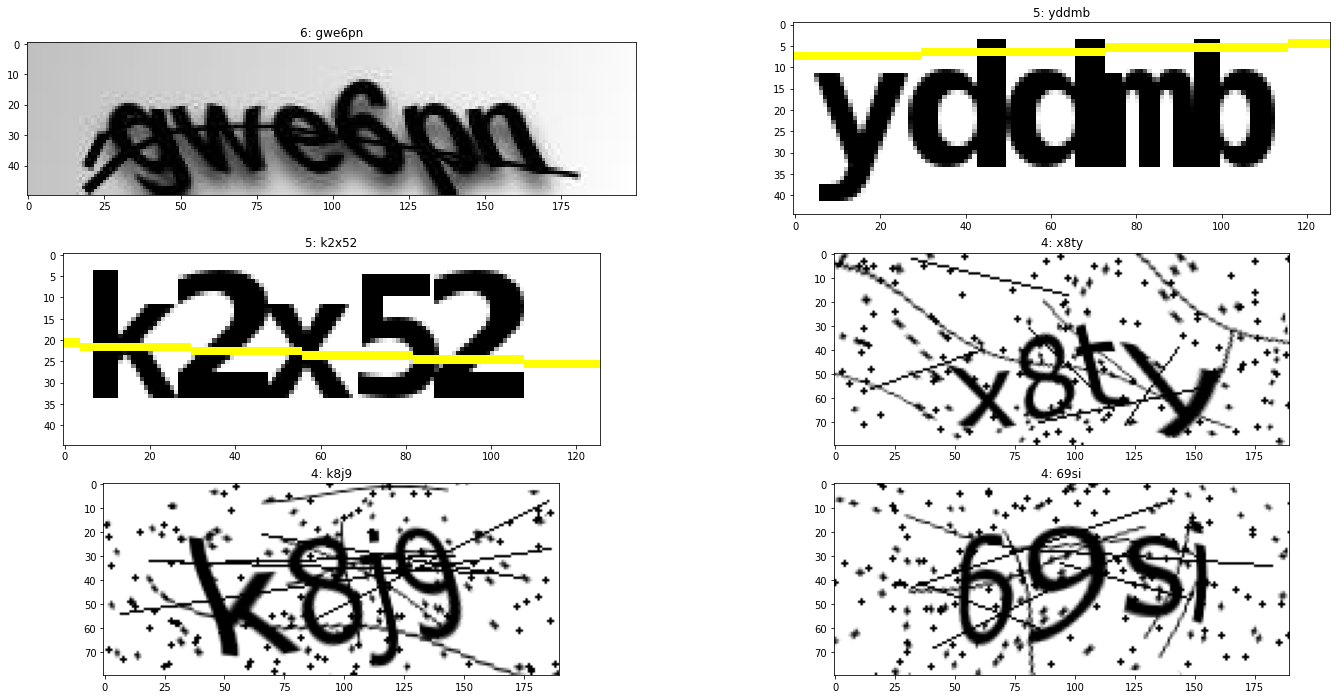

In [ ]:
def display_images_and_labels(dataframe, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(24, 4 * rows))
    for i in range(rows):
        for j in range(cols):
            index = rn.randint(0, dataframe.shape[0] - 1)
            img_path = dataframe['img'][index]
            img = cv.imread(img_path)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            ax[i][j].imshow(img)
            ax[i][j].set_title(str(dataframe['letter'][index]) + ": " + dataframe['label'][index])

display_images_and_labels(df, 3, 2)

In [ ]:
df.head()

,img,letter,label,img_h,img_w
0,/content/5_letters/hfca8.png,5,hfca8,45,126
1,/content/4_letters/7CLG.png,4,7CLG,24,72
2,/content/4_letters/w9q7.png,4,w9q7,80,190
3,/content/5_letters/y48c3.png,5,y48c3,50,200
4,/content/4_letters/36KC.png,4,36KC,24,72


In [ ]:
enc_dict = {'': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12,
            'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24,
            'y': 25, 'z': 26, 'A': 27, 'B': 28, 'C': 29, 'D': 30, 'E': 31, 'F': 32, 'G': 33, 'H': 34, 'I': 35, 'J': 36,
            'K': 37, 'L': 38, 'M': 39, 'N': 40, 'O': 41, 'P': 42, 'Q': 43, 'R': 44, 'S': 45, 'T': 46, 'U': 47, 'V': 48,
            'W': 49, 'X': 50, 'Y': 51, 'Z': 52, '1': 53, '2': 54, '3': 55, '4': 56, '5': 57, '6': 58, '7': 59, '8': 60,
            '9': 61, '0': 62}
def encode(dataframe, encoding_dict):
    dataframe['labels_list'] = dataframe['label'].apply(lambda x: list(x))
    for i in range(dataframe.shape[0]):
        if len(dataframe['labels_list'][i]) < 6:
            for _ in range(6 - len(dataframe['labels_list'][i])):
                dataframe['labels_list'][i].append('')
    dataframe['labels_list'] = dataframe['labels_list'].apply(lambda x: [encoding_dict[i] for i in x])
    return dataframe

df = encode(df, enc_dict)
df.head()

,img,letter,label,img_h,img_w,labels_list
0,/content/5_letters/hfca8.png,5,hfca8,45,126,"[8, 6, 3, 1, 60, 0]"
1,/content/4_letters/7CLG.png,4,7CLG,24,72,"[59, 29, 38, 33, 0, 0]"
2,/content/4_letters/w9q7.png,4,w9q7,80,190,"[23, 61, 17, 59, 0, 0]"
3,/content/5_letters/y48c3.png,5,y48c3,50,200,"[25, 56, 60, 3, 55, 0]"
4,/content/4_letters/36KC.png,4,36KC,24,72,"[55, 58, 37, 29, 0, 0]"


In [ ]:
class Pipeline(ks.utils.Sequence):
    def __init__(self, dataframe, xcol, ycol, batch_size, img_h, img_w, img_c, encoding_dict):
        self.dataframe = dataframe
        self.xcol = xcol
        self.ycol = ycol
        self.batch_size = batch_size
        self.img_h = img_h
        self.img_w = img_w
        self.img_c = img_c
        self.encoding_dict = encoding_dict

    def __len__(self):
        return math.floor(self.dataframe.shape[0] / self.batch_size)

    def on_epoch_end(self):
        self.dataframe = self.dataframe.sample(frac=1)

    def __getitem__(self, index):
        X = np.empty(shape=(self.batch_size, self.img_h, self.img_w, self.img_c), dtype='float32')
        Y_letters = np.empty(shape=(self.batch_size, 3), dtype='float32')
        Y_labels0 = np.empty(shape=(self.batch_size, 63), dtype='float32')
        Y_labels1 = np.empty(shape=(self.batch_size, 63), dtype='float32')
        Y_labels2 = np.empty(shape=(self.batch_size, 63), dtype='float32')
        Y_labels3 = np.empty(shape=(self.batch_size, 63), dtype='float32')
        Y_labels4 = np.empty(shape=(self.batch_size, 63), dtype='float32')
        Y_labels5 = np.empty(shape=(self.batch_size, 63), dtype='float32')
        for i in range(self.batch_size):
            img_path = self.dataframe[self.xcol][i + (self.batch_size * index)]
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            h, w = img.shape
            if h > self.img_h or w > self.img_w:
                img = cv.resize(img, (self.img_w, self.img_h), interpolation=cv.INTER_CUBIC)
            if h < self.img_h:
                img = cv.copyMakeBorder(img, top=math.floor((self.img_h - h) / 2), bottom=math.ceil((self.img_h - h) / 2), left=0, right=0, borderType=cv.BORDER_CONSTANT, value=[255, 255, 255])
            if w < self.img_w:
                img = cv.copyMakeBorder(img, top=0, bottom=0, left=math.floor((self.img_w - w) / 2), right=math.ceil((self.img_w - w) / 2), borderType=cv.BORDER_CONSTANT, value=[255, 255, 255])
            img = np.array(img, dtype='float32')
            img = img.reshape(-1, self.img_h, self.img_w, self.img_c)
            img = img / 255.
            X[i, :, :, :] = img

            letters = self.dataframe[self.ycol[0]][i + (self.batch_size * index)] - 4
            Y_letters[i, :] = ks.utils.to_categorical(letters, num_classes=3)

            labels = self.dataframe[self.ycol[1]][i + (self.batch_size * index)]
            l = []
            for label in labels:
                l.append(ks.utils.to_categorical(label, num_classes=len(self.encoding_dict)))
            Y_labels0[i, :] = l[0]
            Y_labels1[i, :] = l[1]
            Y_labels2[i, :] = l[2]
            Y_labels3[i, :] = l[3]
            Y_labels4[i, :] = l[4]
            Y_labels5[i, :] = l[5]
        return X, [Y_letters, Y_labels0, Y_labels1, Y_labels2, Y_labels3, Y_labels4, Y_labels5]

In [ ]:
train_df, val_df = train_test_split(df, test_size=363/47363, random_state=24)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=9)
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
train_df.shape, val_df.shape, test_df.shape

((47000, 6), (181, 6), (182, 6))

In [ ]:
H, W, C = 50, 150, 1
B = 1
train_gen = Pipeline(dataframe=train_df,
                     xcol='img',
                     ycol=['letter', 'labels_list'],
                     batch_size=B,
                     img_h=H,
                     img_w=W,
                     img_c=C,
                     encoding_dict=enc_dict)
val_gen = Pipeline(dataframe=val_df,
                   xcol='img',
                   ycol=['letter', 'labels_list'],
                   batch_size=B,
                   img_h=H,
                   img_w=W,
                   img_c=C,
                   encoding_dict=enc_dict)
test_gen = Pipeline(dataframe=test_df,
                    xcol='img',
                    ycol=['letter', 'labels_list'],
                    batch_size=B,
                    img_h=H,
                    img_w=W,
                    img_c=C,
                    encoding_dict=enc_dict)
train_gen.__getitem__(0)[0].shape, train_gen.__getitem__(0)[1][0].shape, train_gen.__getitem__(0)[1][1].shape, train_gen.__getitem__(0)[1][2].shape, train_gen.__getitem__(0)[1][3].shape, train_gen.__getitem__(0)[1][4].shape, train_gen.__getitem__(0)[1][5].shape, train_gen.__getitem__(0)[1][6].shape

((1, 50, 150, 1), (1, 3), (1, 63), (1, 63), (1, 63), (1, 63), (1, 63), (1, 63))

In [ ]:
inp_shape = (H, W, C)
X_inp = ks.layers.Input(shape=inp_shape, batch_size=B)

# (50, 150, 1)

X = ks.layers.Conv2D(32, kernel_size=(3, 3), padding='valid')(X_inp)
X = ks.layers.BatchNormalization()(X)
X = ks.layers.MaxPooling2D(pool_size=2)(X)
X = ks.layers.Activation('relu')(X)

# (24, 74, 32)

X = ks.layers.Conv2D(64, kernel_size=(1, 3), padding='valid')(X)
X = ks.layers.BatchNormalization()(X)
X = ks.layers.MaxPooling2D(pool_size=2)(X)
X = ks.layers.Activation('relu')(X)

# (12, 36, 64)

X = ks.layers.Conv2D(128, kernel_size=(3, 3), padding='valid')(X)
X = ks.layers.BatchNormalization()(X)
X = ks.layers.MaxPooling2D(pool_size=2)(X)
X = ks.layers.Activation('relu')(X)

# (5, 17, 128)

X = ks.layers.Conv2D(256, kernel_size=(3, 3), padding='valid')(X)
X = ks.layers.BatchNormalization()(X)
X = ks.layers.MaxPooling2D(pool_size=3)(X)
X = ks.layers.Activation('relu')(X)

X = ks.layers.Flatten()(X)

X_letters = ks.layers.Dense(3, name='letters', activation='softmax')(X)

X = ks.layers.Dense(512, activation='relu')(X)
X = ks.layers.Concatenate()([X, X_letters])

X = ks.layers.Dense(256, activation='relu')(X)
X = ks.layers.Dropout(0.2)(X)

outs = [X_letters]
for i in range(6):
    temp = ks.layers.Dense(64, activation='relu')(X)
    temp = ks.layers.Dense(63, activation='softmax', name=f'labels{i}')(temp)
    outs.append(temp)

model = ks.Model(inputs=X_inp, outputs=outs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 50, 150, 1)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (1, 48, 148, 32)     320         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (1, 48, 148, 32)    128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling2d (MaxPooling2D)   (1, 24, 74, 32)      0           ['batch_normalization[0][0]']

In [ ]:
l = {'letters': 'categorical_crossentropy',
     'labels0': 'categorical_crossentropy',
     'labels1': 'categorical_crossentropy',
     'labels2': 'categorical_crossentropy',
     'labels3': 'categorical_crossentropy',
     'labels4': 'categorical_crossentropy',
     'labels5': 'categorical_crossentropy'}

m = {'letters': 'categorical_accuracy',
     'labels0': 'categorical_accuracy',
     'labels1': 'categorical_accuracy',
     'labels2': 'categorical_accuracy',
     'labels3': 'categorical_accuracy',
     'labels4': 'categorical_accuracy',
     'labels5': 'categorical_accuracy'}

In [ ]:
model.compile(optimizer=ks.optimizers.Adam(learning_rate=1e-4), loss=l, metrics=m)
e = 100
es = ks.callbacks.EarlyStopping(monitor='val_labels3_categorical_accuracy', patience=5, mode='max', restore_best_weights=True)
rlrop = ks.callbacks.ReduceLROnPlateau(monitor='val_labels3_categorical_accuracy', patience=3, mode='max', factor=0.3)
mc = ks.callbacks.ModelCheckpoint('/content/weights.h5', monitor='val_labels3_categorical_accuracy', mode='max', save_best_only=True)
fit = model.fit(train_gen, epochs=e, callbacks=[es, rlrop, mc], validation_data=val_gen)

Epoch 1/100
47000/47000 [==============================] - 740s 15ms/step - loss: 11.9023 - letters_loss: 0.0061 - labels0_loss: 2.5338 - labels1_loss: 2.3703 - labels2_loss: 2.8491 - labels3_loss: 2.4531 - labels4_loss: 1.1618 - labels5_loss: 0.5280 - letters_categorical_accuracy: 0.9987 - labels0_categorical_accuracy: 0.2513 - labels1_categorical_accuracy: 0.2674 - labels2_categorical_accuracy: 0.1695 - labels3_categorical_accuracy: 0.2440 - labels4_categorical_accuracy: 0.6433 - labels5_categorical_accuracy: 0.8349 - val_loss: 14.7440 - val_letters_loss: 0.7005 - val_labels0_loss: 2.5030 - val_labels1_loss: 2.6832 - val_labels2_loss: 3.3733 - val_labels3_loss: 2.7401 - val_labels4_loss: 1.1974 - val_labels5_loss: 1.5464 - val_letters_categorical_accuracy: 0.7293 - val_labels0_categorical_accuracy: 0.3923 - val_labels1_categorical_accuracy: 0.4088 - val_labels2_categorical_accuracy: 0.2597 - val_labels3_categorical_accuracy: 0.2983 - val_labels4_categorical_accuracy: 0.6133 - val_lab

In [ ]:
model.save('model.hdf5')
model.evaluate(test_gen)

182/182 [==============================] - 2s 11ms/step - loss: 20.9274 - letters_loss: 2.0614 - labels0_loss: 4.2776 - labels1_loss: 2.5026 - labels2_loss: 4.5460 - labels3_loss: 2.9129 - labels4_loss: 1.2664 - labels5_loss: 3.3605 - letters_categorical_accuracy: 0.7692 - labels0_categorical_accuracy: 0.2692 - labels1_categorical_accuracy: 0.4451 - labels2_categorical_accuracy: 0.3791 - labels3_categorical_accuracy: 0.3077 - labels4_categorical_accuracy: 0.6978 - labels5_categorical_accuracy: 0.7692


[20.92740249633789,
 2.0614027976989746,
 4.277591705322266,
 2.502568244934082,
 4.54599666595459,
 2.912904739379883,
 1.2664480209350586,
 3.360491991043091,
 0.7692307829856873,
 0.26923078298568726,
 0.44505494832992554,
 0.3791208863258362,
 0.3076923191547394,
 0.6978021860122681,
 0.7692307829856873]

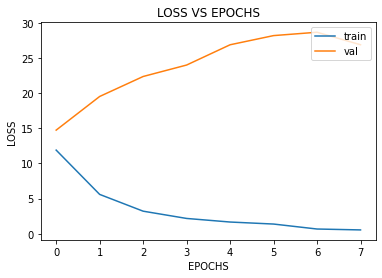

In [ ]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('LOSS VS EPOCHS')
plt.ylabel('LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

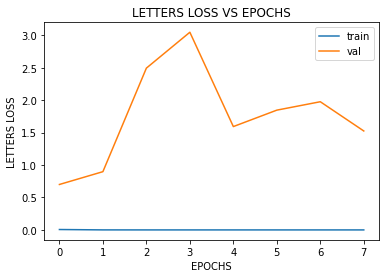

In [ ]:
plt.plot(fit.history['letters_loss'])
plt.plot(fit.history['val_letters_loss'])
plt.title('LETTERS LOSS VS EPOCHS')
plt.ylabel('LETTERS LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

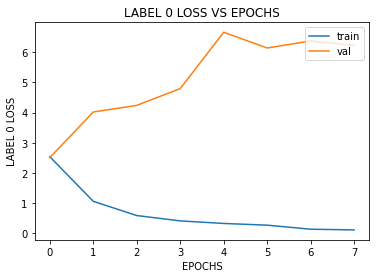

In [ ]:
plt.plot(fit.history['labels0_loss'])
plt.plot(fit.history['val_labels0_loss'])
plt.title('LABEL 0 LOSS VS EPOCHS')
plt.ylabel('LABEL 0 LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

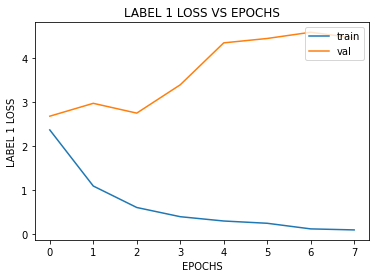

In [ ]:
plt.plot(fit.history['labels1_loss'])
plt.plot(fit.history['val_labels1_loss'])
plt.title('LABEL 1 LOSS VS EPOCHS')
plt.ylabel('LABEL 1 LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

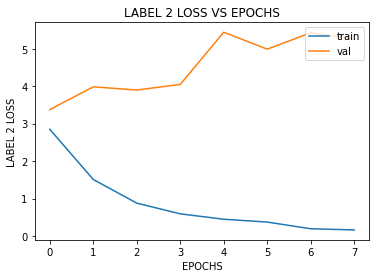

In [ ]:
plt.plot(fit.history['labels2_loss'])
plt.plot(fit.history['val_labels2_loss'])
plt.title('LABEL 2 LOSS VS EPOCHS')
plt.ylabel('LABEL 2 LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

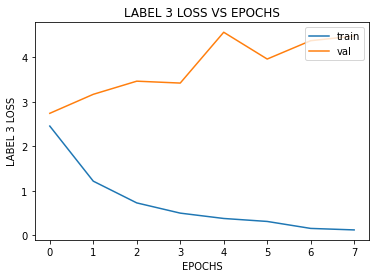

In [ ]:
plt.plot(fit.history['labels3_loss'])
plt.plot(fit.history['val_labels3_loss'])
plt.title('LABEL 3 LOSS VS EPOCHS')
plt.ylabel('LABEL 3 LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

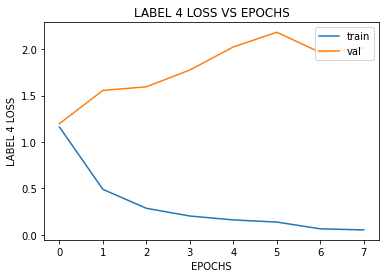

In [ ]:
plt.plot(fit.history['labels4_loss'])
plt.plot(fit.history['val_labels4_loss'])
plt.title('LABEL 4 LOSS VS EPOCHS')
plt.ylabel('LABEL 4 LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

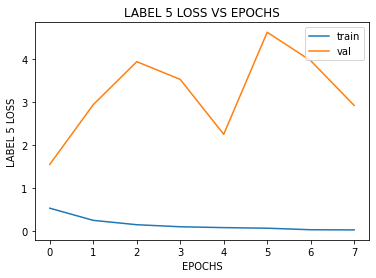

In [ ]:
plt.plot(fit.history['labels5_loss'])
plt.plot(fit.history['val_labels5_loss'])
plt.title('LABEL 5 LOSS VS EPOCHS')
plt.ylabel('LABEL 5 LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

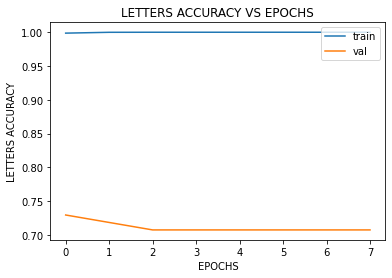

In [ ]:
plt.plot(fit.history['letters_categorical_accuracy'])
plt.plot(fit.history['val_letters_categorical_accuracy'])
plt.title('LETTERS ACCURACY VS EPOCHS')
plt.ylabel('LETTERS ACCURACY')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

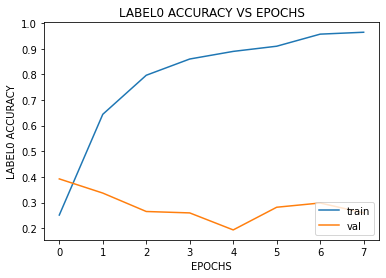

In [ ]:
plt.plot(fit.history['labels0_categorical_accuracy'])
plt.plot(fit.history['val_labels0_categorical_accuracy'])
plt.title('LABEL0 ACCURACY VS EPOCHS')
plt.ylabel('LABEL0 ACCURACY')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

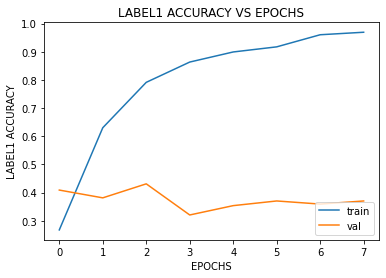

In [ ]:
plt.plot(fit.history['labels1_categorical_accuracy'])
plt.plot(fit.history['val_labels1_categorical_accuracy'])
plt.title('LABEL1 ACCURACY VS EPOCHS')
plt.ylabel('LABEL1 ACCURACY')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

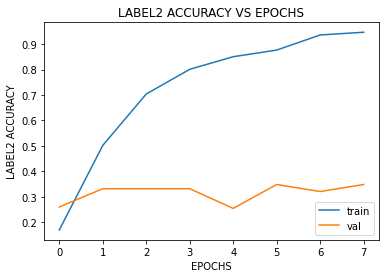

In [ ]:
plt.plot(fit.history['labels2_categorical_accuracy'])
plt.plot(fit.history['val_labels2_categorical_accuracy'])
plt.title('LABEL2 ACCURACY VS EPOCHS')
plt.ylabel('LABEL2 ACCURACY')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

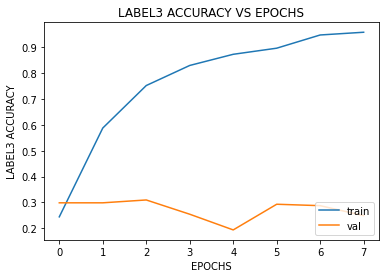

In [ ]:
plt.plot(fit.history['labels3_categorical_accuracy'])
plt.plot(fit.history['val_labels3_categorical_accuracy'])
plt.title('LABEL3 ACCURACY VS EPOCHS')
plt.ylabel('LABEL3 ACCURACY')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

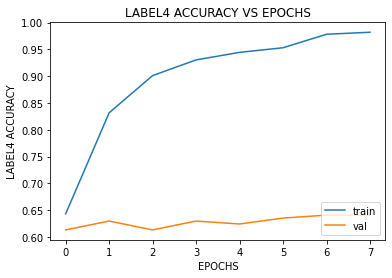

In [ ]:
plt.plot(fit.history['labels4_categorical_accuracy'])
plt.plot(fit.history['val_labels4_categorical_accuracy'])
plt.title('LABEL4 ACCURACY VS EPOCHS')
plt.ylabel('LABEL4 ACCURACY')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

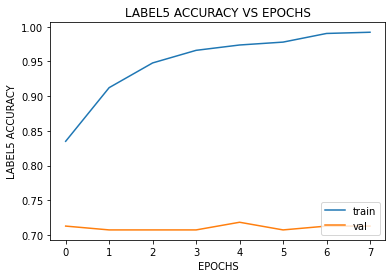

In [ ]:
plt.plot(fit.history['labels5_categorical_accuracy'])
plt.plot(fit.history['val_labels5_categorical_accuracy'])
plt.title('LABEL5 ACCURACY VS EPOCHS')
plt.ylabel('LABEL5 ACCURACY')
plt.xlabel('EPOCHS')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

LETTERS IN CAPTCHA: 4, ACCURACY: 99.99880790710449%
1st LETTER: v, ACCURACY: 83.05983543395996%
2nd LETTER: 2, ACCURACY: 94.03020739555359%
3rd LETTER: v, ACCURACY: 52.546173334121704%
4th LETTER: e, ACCURACY: 74.70918297767639%
5th LETTER: , ACCURACY: 100.0%
6th LETTER: , ACCURACY: 100.0%
FINAL CAPTCHA: v2ve


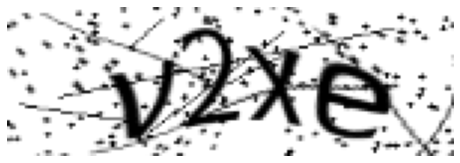

In [ ]:
def get_index_and_max_prob(p):
    r = p.shape[1]
    p = p.reshape(r)
    max_prob = 0
    ind = 0
    for i in range(r):
        if p[i] > max_prob:
            ind = i
            max_prob = p[i]
    return ind, max_prob

def test_model(dataframe):
    l = list(enc_dict.keys())
    index = rn.randint(0, dataframe.shape[0] - 1)
    img_path = dataframe['img'][index]
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (150, 50))
    img_np = np.array(img, dtype='float32')
    img_np = img_np.reshape(-1, 50, 150, 1)
    img_np = img_np / 255.
    pred = model.predict(img_np)

    letters_ind, letters_prob = get_index_and_max_prob(pred[0])
    letters_ind = letters_ind + 4
    print(f"LETTERS IN CAPTCHA: {letters_ind}, ACCURACY: {letters_prob * 100}%")

    label0_ind, label0_prob = get_index_and_max_prob(pred[1])
    l0 = l[label0_ind]
    print(f"1st LETTER: {l0}, ACCURACY: {label0_prob * 100}%")

    label1_ind, label1_prob = get_index_and_max_prob(pred[2])
    label1_ind, label1_prob = get_index_and_max_prob(pred[2])
    l1 = l[label1_ind]
    print(f"2nd LETTER: {l1}, ACCURACY: {label1_prob * 100}%")

    label2_ind, label2_prob = get_index_and_max_prob(pred[3])
    label2_ind, label2_prob = get_index_and_max_prob(pred[3])
    l2 = l[label0_ind]
    print(f"3rd LETTER: {l2}, ACCURACY: {label2_prob * 100}%")

    label3_ind, label3_prob = get_index_and_max_prob(pred[4])
    label3_ind, label3_prob = get_index_and_max_prob(pred[4])
    l3 = l[label3_ind]
    print(f"4th LETTER: {l3}, ACCURACY: {label3_prob * 100}%")

    label4_ind, label4_prob = get_index_and_max_prob(pred[5])
    label4_ind, label4_prob = get_index_and_max_prob(pred[5])
    l4 = l[label4_ind]
    print(f"5th LETTER: {l4}, ACCURACY: {label4_prob * 100}%")

    label5_ind, label5_prob = get_index_and_max_prob(pred[6])
    label5_ind, label5_prob = get_index_and_max_prob(pred[6])
    l5 = l[label5_ind]
    print(f"6th LETTER: {l5}, ACCURACY: {label5_prob * 100}%")

    print(f"FINAL CAPTCHA: {l0 + l1 + l2 + l3 + l4 + l5}")

    fig = plt.figure(figsize=(8, 4))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

test_model(test_df)

LETTERS IN CAPTCHA: 5, ACCURACY: 99.99916553497314%
1st LETTER: b, ACCURACY: 51.80725455284119%
2nd LETTER: d, ACCURACY: 50.16874074935913%
3rd LETTER: b, ACCURACY: 56.57665133476257%
4th LETTER: e, ACCURACY: 39.84788358211517%
5th LETTER: 6, ACCURACY: 95.09720206260681%
6th LETTER: , ACCURACY: 100.0%
FINAL CAPTCHA: bdbe6


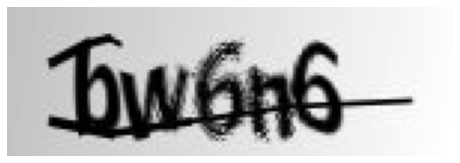

In [ ]:
test_model(test_df)

LETTERS IN CAPTCHA: 4, ACCURACY: 97.8800356388092%
1st LETTER: f, ACCURACY: 49.44188594818115%
2nd LETTER: 9, ACCURACY: 67.82885789871216%
3rd LETTER: f, ACCURACY: 34.439754486083984%
4th LETTER: 6, ACCURACY: 74.57964420318604%
5th LETTER: , ACCURACY: 99.73747730255127%
6th LETTER: , ACCURACY: 100.0%
FINAL CAPTCHA: f9f6


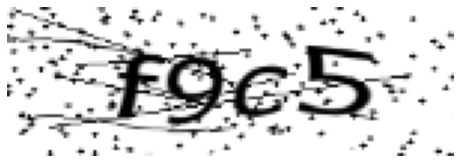

In [ ]:
test_model(test_df)

LETTERS IN CAPTCHA: 4, ACCURACY: 97.04377055168152%
1st LETTER: h, ACCURACY: 37.14489936828613%
2nd LETTER: y, ACCURACY: 74.76227879524231%
3rd LETTER: h, ACCURACY: 82.59600400924683%
4th LETTER: a, ACCURACY: 33.66231322288513%
5th LETTER: , ACCURACY: 96.46075367927551%
6th LETTER: , ACCURACY: 99.56814050674438%
FINAL CAPTCHA: hyha


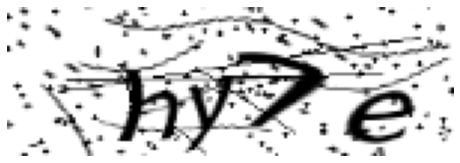

In [ ]:
test_model(test_df)

LETTERS IN CAPTCHA: 4, ACCURACY: 99.99903440475464%
1st LETTER: q, ACCURACY: 24.936433136463165%
2nd LETTER: 2, ACCURACY: 95.34721374511719%
3rd LETTER: q, ACCURACY: 62.4048113822937%
4th LETTER: o, ACCURACY: 41.41251742839813%
5th LETTER: , ACCURACY: 100.0%
6th LETTER: , ACCURACY: 100.0%
FINAL CAPTCHA: q2qo


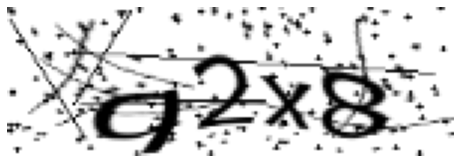

In [ ]:
test_model(test_df)